In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pytesseract as ocr
import cv2
import skimage
from skimage.filters import try_all_threshold
from skimage import filters
from skimage import exposure
from skimage.io import imread
from PIL import Image
from IPython import display
import random
import imutils

from pre_process import PreProcess,auto_brightandcontrast,perfect_binary
import time

In [2]:
#cli_config = '--oem 1 --psm 12 --tessdata-dir ~/tessdata/ -l eng+equ+ben+hin'

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen
3


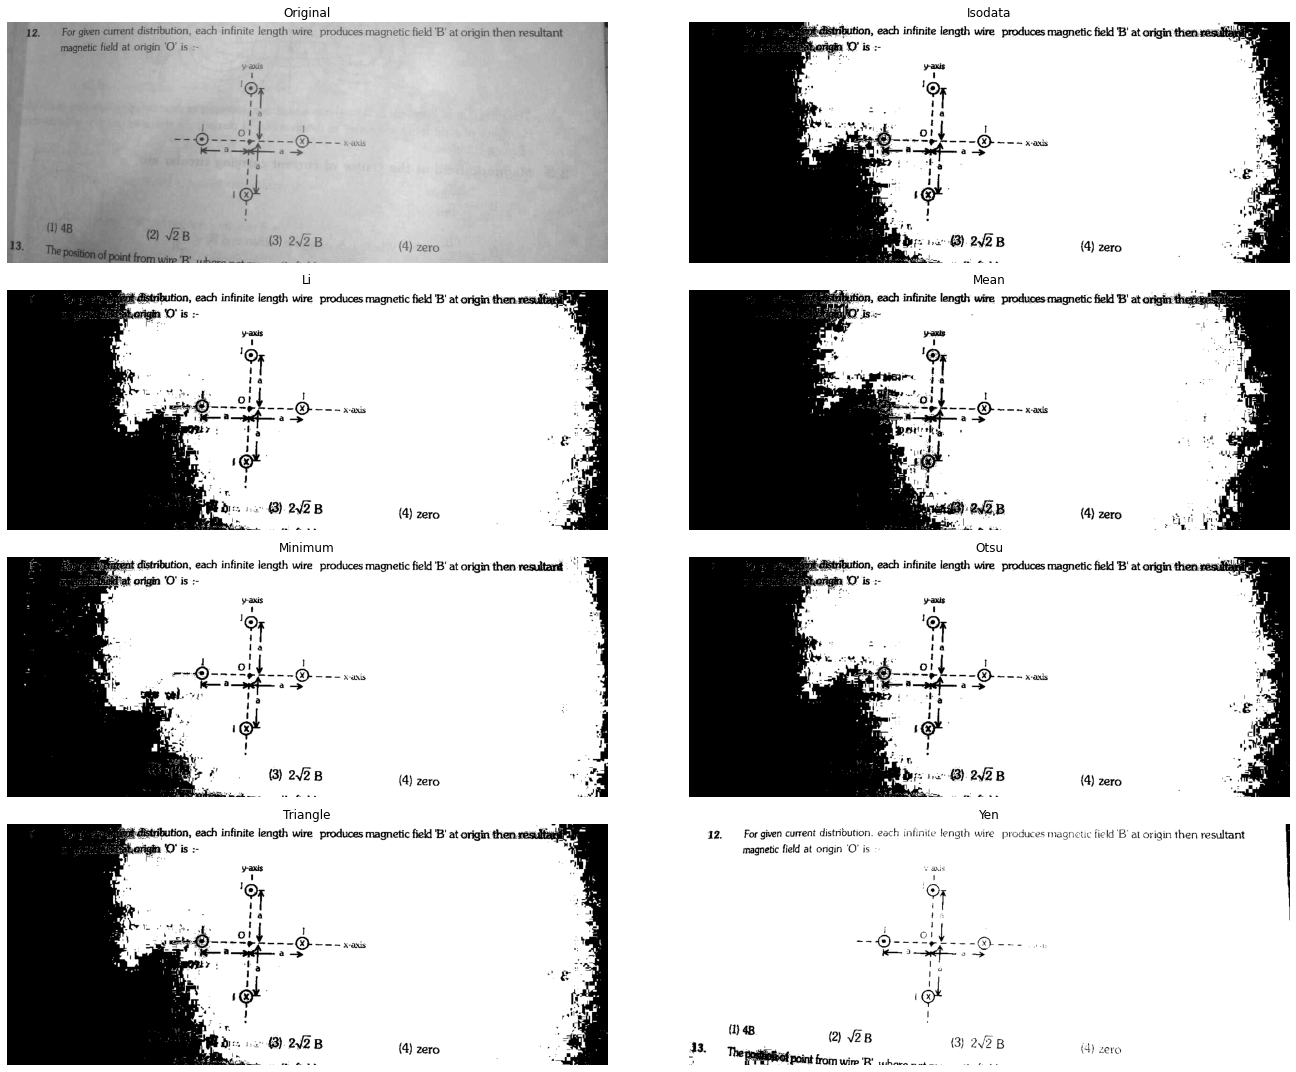

In [16]:
DIR = 'sample_images/'


n = np.random.randint(0,43) # random image
img_path = DIR+str(n)+'.png'
sk_image = imread(img_path,as_gray=True) # sklearn image

fig,ax = try_all_threshold(sk_image,figsize=(20,15))
#plt.save('threshold.jpeg',dpi=350)
print(n)
plt.show()


### Pattern shows that:
1. `Yen` is for images which have lots of dark region and suppresses the region. It also tend to word good with very light images. So in general terms, it tend to work well with images which have brightness/intensity **outliers**.
2. `Minimum` fails when images are too light/bright and words tend to fade.
3. `Mean` and `Triangle` are hardly of use because when there is **dark** region in the image, it tends to focus on that and makes the image completely black until light region.

# Try out different things
## One or more might work. You need to try which one works best for the case
1. Gaussian Filters
2. Changing Intensity using `yen threshold`
3. Equalize Histogram
4. Use CLAHE
5. Adjust Gamma
6. Adjust Log

In [17]:
im = imread(img_path,as_gray=True)
#im = filters.gaussian(sk_image,0.3,multichannel=False)

#yen_threshold = filters.threshold_yen(im)
#bright = exposure.rescale_intensity(im, (0, yen_threshold), (0, 255))



#im = exposure.equalize_hist(im)
im = exposure.equalize_adapthist(im) # CLAHE

im = exposure.adjust_gamma(im,1.2)
#im = exposure.adjust_log(im,0.7)

#fig,ax = try_all_threshold(im,figsize=(20,15)) # plot thresholds

plt.show()


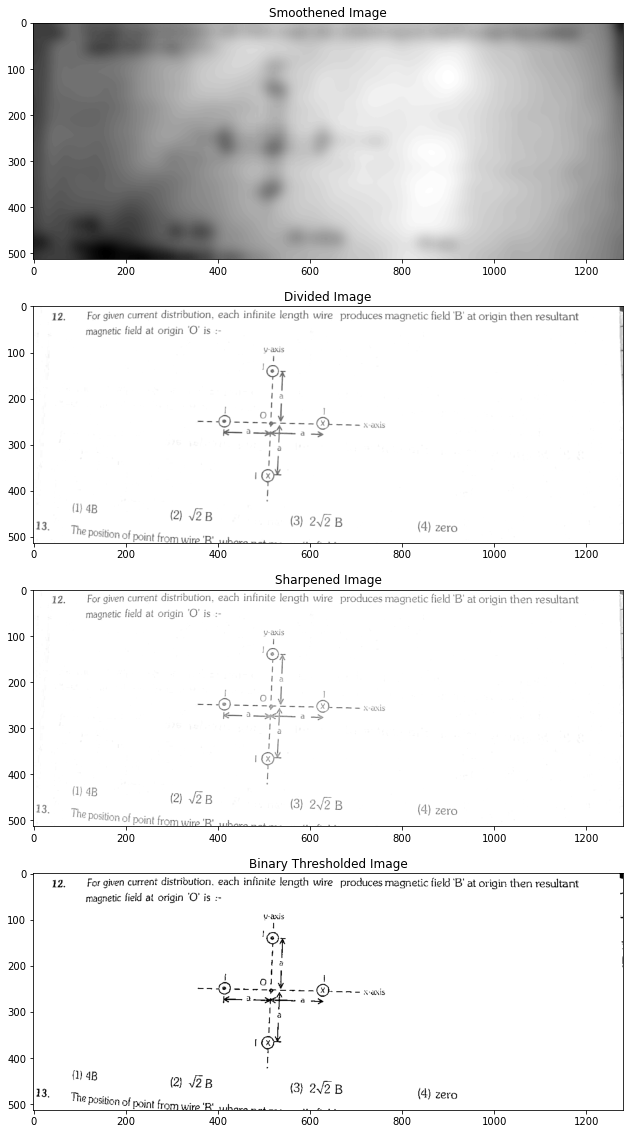

In [18]:
smooth,division,sharp,thresh = perfect_binary(img_path)

f,ax = plt.subplots(4,1,figsize=(15,20))
ax = ax.ravel()

ax[0].imshow(smooth,cmap='gray')
ax[0].set_title('Smoothened Image')

ax[1].imshow(division,cmap='gray')
ax[1].set_title('Divided Image')

ax[2].imshow(sharp,cmap='gray')
ax[2].set_title('Sharpened Image')

ax[3].imshow(thresh,cmap='gray')
ax[3].set_title('Binary Thresholded Image')

plt.show()

# Auto Brightness and Contrast Change (1 channel at a time)

In [19]:
# image = cv2.imread(img_path)
# f,ax = plt.subplots(5,1,figsize=(15,25))
# ax = ax.ravel()

# ax[0].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
# ax[0].set_title('Original in BGR Format')

# ax[1].imshow(cv2.cvtColor(auto_brightandcontrast(image,0),cv2.COLOR_BGR2RGB))
# ax[1].set_title('Propetries changed for First channel')

# ax[2].imshow(cv2.cvtColor(auto_brightandcontrast(image,1),cv2.COLOR_BGR2RGB))
# ax[2].set_title('Propetries changed for Second channel')

# ax[3].imshow(cv2.cvtColor(auto_brightandcontrast(image,2),cv2.COLOR_BGR2RGB))
# ax[3].set_title('Propetries changed for Third channel')

# ax[4].imshow(auto_brightandcontrast(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY),0),cmap='gray')
# ax[4].set_title('Propetries changed for GrayScale')

# plt.show()

In [23]:
cli_config = '--oem 1 --psm 12' # OCR config params Check OEM and PSM parameters
# ! tesseract --help-extra # for OEM and PSM info
print(ocr.image_to_string(image=thresh,config=cli_config,lang='eng+equ+hin'))

12.

For given current distribution, each infinite length wire produces magnetic field 'B' at origin then resultant

magnetic field at origin ‘O’ is :-

Waals

‘@

−−

≺⊃−

|

!

a

~@.— ~~ sas

i 2 arch

=

(1) 4B

(2) 28

13

(3) 2V2 B

(4) zero

The position

of point from wire "Ri ok.

